In [44]:
import matplotlib.pyplot as plt 
import torch
import torchaudio
import numpy as np

from src.utils import Mode
from src.models.CleanUNet.dataset import CleanUNetDatasetCSV
from src.models.CleanUNet.stft_loss import stft

In [ ]:
dataset = CleanUNetDatasetCSV('../data/', 6120,mode=Mode.TEST)

start loading pickle files
finished loading pickle files


In [ ]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=1)
noisy_eq, eq, shift = next(iter(dataloader))

In [37]:
audio, audio_length  = torchaudio.load('/cluster/scratch/ckeusch/Baseline/Track1_Headset/nonpersonalized_baseline/A1I63OL2TAXTGJ_F_NoNoise_Regular_HS_Desk_Neighbor_fid11.wav')

torch.Size([160000])
tensor(-0.0842)
tensor(0.0697)


tensor(-2.9640e-05)


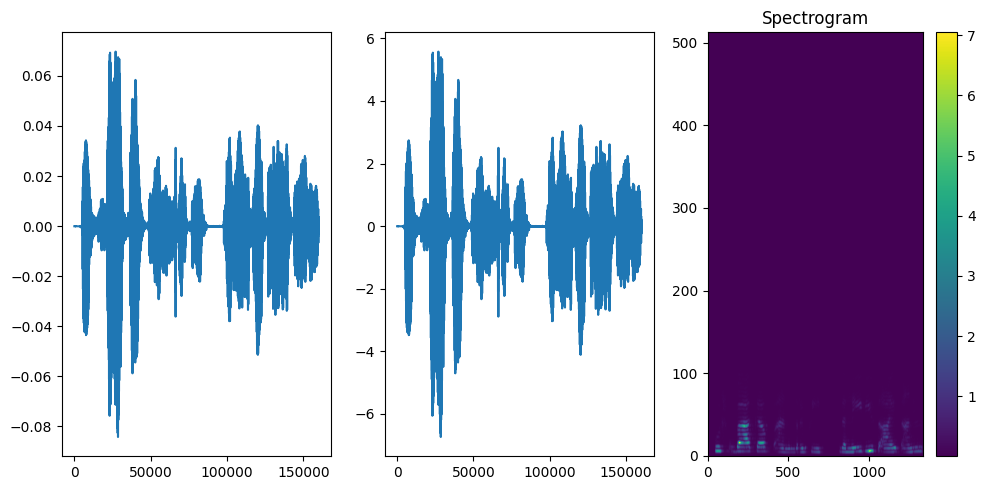

In [ ]:
fft_sizes=[1024, 2048, 512]
hop_sizes=[120, 240, 50] 
win_lengths=[600, 1200, 240]

fft_size = fft_sizes[0]
hop_size = hop_sizes[0]
win_length = win_lengths[0]

fig, axs = plt.subplots(1,3, figsize=(10,5))

cropped_audio = audio[0,:160000]

print(cropped_audio.shape)
print(cropped_audio.min())
print(cropped_audio.max())
print(cropped_audio.mean())

axs[0].plot(range(160000), cropped_audio)
axs[1].plot(range(160000), cropped_audio / cropped_audio.std())


window = getattr(torch, "hann_window")(win_length)
spec = stft(cropped_audio.unsqueeze(0), fft_size, hop_size, win_length, window)
im = axs[2].imshow(spec.squeeze(0).T, origin='lower', aspect='auto')
axs[2].set_title("Spectrogram")
fig.colorbar(im, ax=axs[2])  # Add colorbar for context

plt.tight_layout()
plt.show()

2.330616641211392e-14

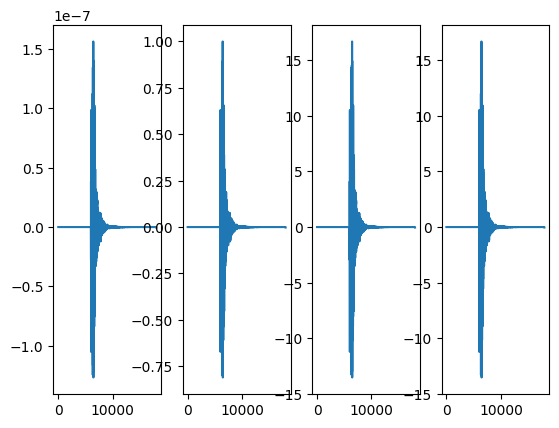

In [61]:
eq = np.load('/cluster/scratch/ckeusch/data/signal/train/2009/signal_2009_004_M09_D22_CH_FUORN_HHN.npz')
eq_wave = eq['earthquake_waveform_E']
max_scaled = eq_wave / np.max(np.abs(eq_wave))
fig, axs = plt.subplots(1,4)
axs[0].plot(range(len(eq_wave)), eq_wave)
axs[1].plot(range(len(eq_wave)), max_scaled)
axs[2].plot(range(len(eq_wave)), eq_wave / eq_wave.std())
axs[3].plot(range(len(eq_wave)), max_scaled / max_scaled.std())

np.linalg.norm(eq_wave / eq_wave.std() - max_scaled / max_scaled.std())
